Epoch 1/1000
194/194 [==============================] - 57s 272ms/step - loss: 0.2522 - accuracy: 0.8933 - val_loss: 0.1158 - val_accuracy: 0.9632
Epoch 2/1000
194/194 [==============================] - 44s 227ms/step - loss: 0.0642 - accuracy: 0.9787 - val_loss: 0.0957 - val_accuracy: 0.9664
Epoch 3/1000
194/194 [==============================] - 38s 194ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.1050 - val_accuracy: 0.9690
Epoch 4/1000
194/194 [==============================] - 38s 195ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.1162 - val_accuracy: 0.9625
Epoch 5/1000
194/194 [==============================] - 35s 181ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1493 - val_accuracy: 0.9528
Epoch 6/1000
194/194 [==============================] - 33s 168ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.1418 - val_accuracy: 0.9612
Epoch 7/1000
194/194 [==============================] - 33s 171ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0

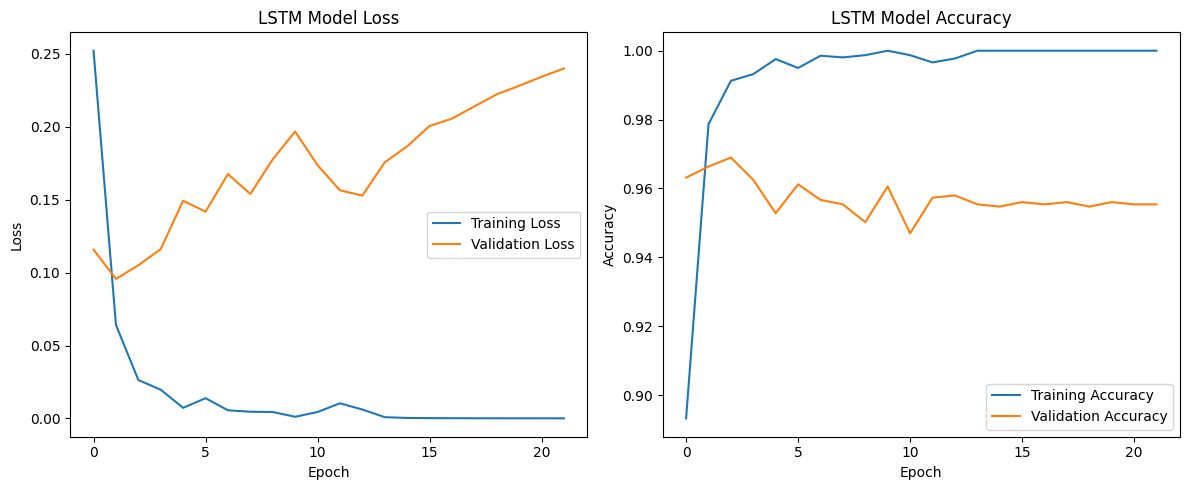

49/49 [==============================] - 3s 55ms/step
Confusion Matrix (LSTM):
[[767  16]
 [ 36 728]]
Classification Report (LSTM):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       783
           1       0.98      0.95      0.97       764

    accuracy                           0.97      1547
   macro avg       0.97      0.97      0.97      1547
weighted avg       0.97      0.97      0.97      1547



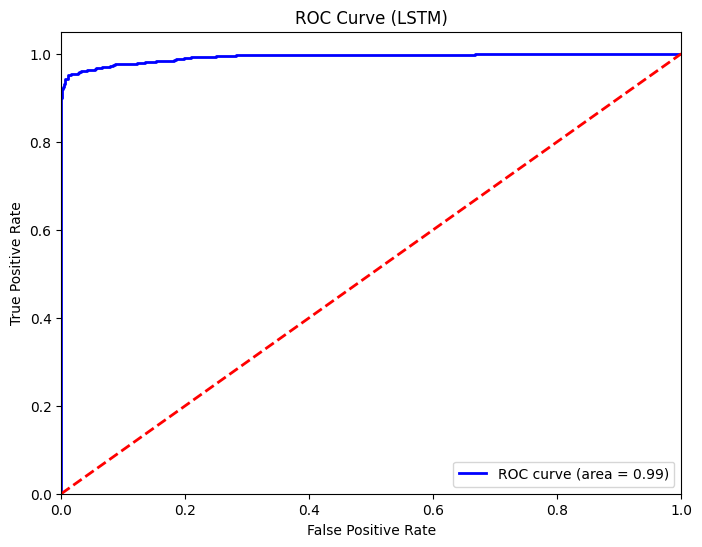

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load the dataset
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')

# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_text'])
X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X)

y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
maxlen = X.shape[1]

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with unlimited epochs
lstm_history = lstm_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # Changed the subplot position
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # Changed the subplot position
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Identify NaN values in y_test
nan_indices = np.where(np.isnan(y_test))[0]

# Drop rows with NaN values from y_test and X_test
y_test = np.delete(y_test, nan_indices)
X_test = np.delete(X_test, nan_indices, axis=0)

# Predict probabilities for the test set
y_pred_prob_lstm = lstm_model.predict(X_test).ravel()

# Convert probabilities to class labels
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

# Generate confusion matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Print confusion matrix
print("Confusion Matrix (LSTM):")
print(conf_matrix_lstm)

# Generate classification report
class_report_lstm = classification_report(y_test, y_pred_lstm)
print("Classification Report (LSTM):")
print(class_report_lstm)

# Plot ROC curve
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_prob_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LSTM)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file on Google Drive
file_path = "/content/drive/My Drive/merged_tensors_with_labels.csv"

# Copy the file to Colab under the /content directory
!cp "{file_path}" /content

# Load the CSV file into a DataFrame
import pandas as pd
df = pd.read_csv("/content/merged_tensors_with_labels.csv")

# Display the DataFrame
print(df.head())

Mounted at /content/drive
          0         1         2         3         4         5         6  \
0 -0.788955 -0.452171 -0.718902  0.524362  0.407345 -0.054561  0.599061   
1 -0.786391 -0.536763 -0.928366  0.635211  0.677996 -0.164220  0.391323   
2 -0.760979 -0.356124 -0.678704  0.650039  0.453287 -0.208375  0.471421   
3 -0.645143 -0.442135 -0.855603  0.572795  0.629087 -0.262791  0.218573   
4 -0.715979 -0.244338 -0.451217  0.467052  0.265069 -0.223246 -0.013612   

          7         8         9  ...       759       760       761       762  \
0  0.322636 -0.314898 -0.999944  ...  0.029673  0.846054  0.820441  0.263943   
1  0.416578 -0.727519 -0.999947  ... -0.129403  0.900940  0.696012  0.549645   
2  0.159647 -0.395316 -0.999743  ...  0.439547  0.853939  0.784838  0.883011   
3  0.249878 -0.622201 -0.999599  ...  0.541194  0.944661  0.662793  0.681176   
4  0.125522 -0.200415 -0.999057  ...  0.191682  0.713078  0.695555  0.938667   

        763       764       765       766 

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/20], Train Loss: 0.3985, Test Loss: 0.3270, Train Accuracy: 82.52%, Test Accuracy: 86.43%
Epoch [2/20], Train Loss: 0.2985, Test Loss: 0.2695, Train Accuracy: 87.21%, Test Accuracy: 89.53%
Epoch [3/20], Train Loss: 0.2425, Test Loss: 0.2631, Train Accuracy: 90.17%, Test Accuracy: 89.14%
Epoch [4/20], Train Loss: 0.2221, Test Loss: 0.2266, Train Accuracy: 91.20%, Test Accuracy: 91.01%
Epoch [5/20], Train Loss: 0.2171, Test Loss: 0.2562, Train Accuracy: 91.28%, Test Accuracy: 89.79%
Epoch [6/20], Train Loss: 0.1993, Test Loss: 0.1952, Train Accuracy: 92.06%, Test Accuracy: 92.31%
Epoch [7/20], Train Loss: 0.1953, Test Loss: 0.1941, Train Accuracy: 92.30%, Test Accuracy: 92.76%
Epoch [8/20], Train Loss: 0.1876, Test Loss: 0.1862, Train Accuracy: 92.46%, Test Accuracy: 92.95%
Epoch [9/20], Train Loss: 0.1844, Test Loss: 0.1789, Train Accuracy: 92.69%, Test Accuracy: 93.21%
Epoch [10/20], Train Loss: 0.1751, Test Loss: 0.1862, Train Accuracy: 92.90%, Test Accuracy: 92.76%
Epoch [11

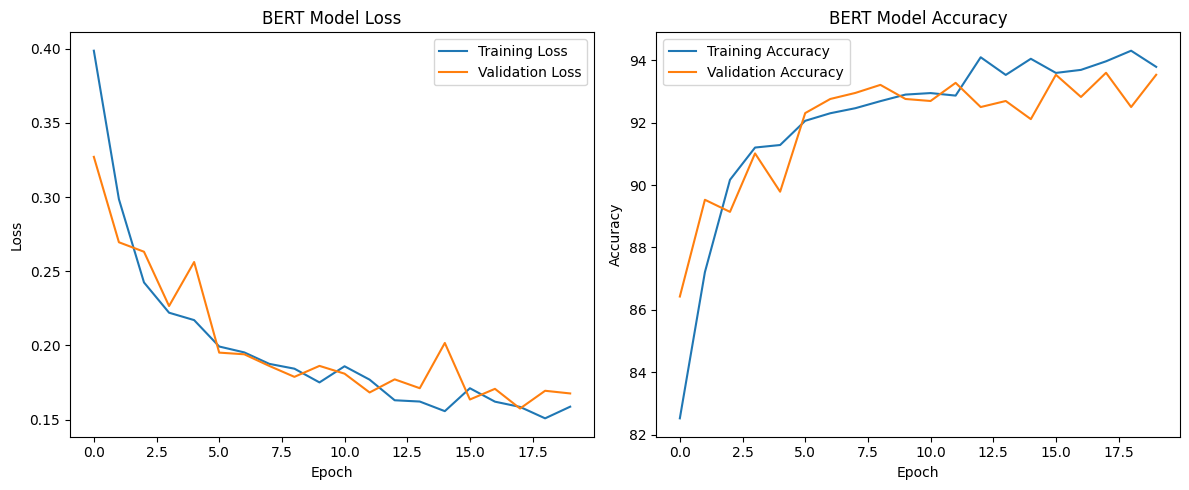

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
import matplotlib.pyplot as plt

# Load the encoded data
df = pd.read_csv("/content/merged_tensors_with_labels.csv")

# Extract features and labels
features = df.drop(columns=['is_depression']).values
labels = df['is_depression'].values

# Split the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Define data loaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the model
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleClassifier(input_size=train_features.shape[1], hidden_size=64, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Early stopping with patience 20
early_stopping = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=20, threshold=0.0001, mode='min', verbose=True)

# Train the model
best_accuracy = 0
best_epoch = 0
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
num_epochs = 20  # Changed to 20 epochs
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        predictions = []
        true_labels = []
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_accuracy)

    # Update best accuracy and epoch if needed
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_epoch = epoch + 1

    # Apply learning rate scheduler
    early_stopping.step(test_loss)

    # Check for early stopping
    if early_stopping._last_lr[0] <= early_stopping.eps:
        print(f"Early stopping at Epoch [{epoch+1}/{num_epochs}]")
        break

    # Print accuracy and loss for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%")

# Print best accuracy and epoch
print(f"Best Test Accuracy: {best_accuracy:.2f}% at Epoch {best_epoch}")

# Generate classification report
print("Final Classification Report:")
print(classification_report(true_labels, predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # Changed the subplot position
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('BERT Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # Changed the subplot position
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('BERT Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


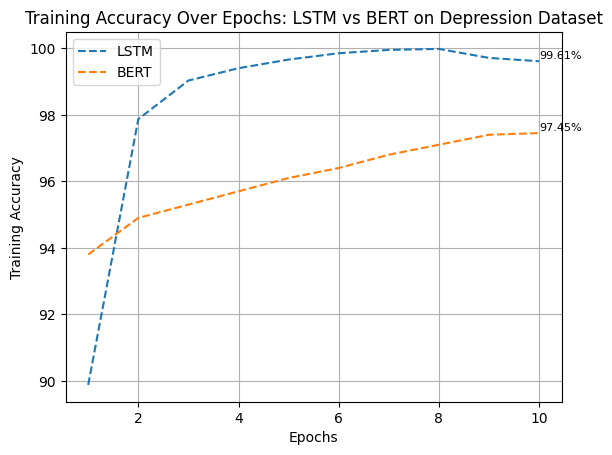

In [ ]:
import matplotlib.pyplot as plt

# Define epochs and training accuracies for LSTM and BERT
epochs = list(range(1, 11))  # Assuming 10 epochs
lstm_train_acc = [89.88, 97.87, 99.03, 99.40, 99.66, 99.85, 99.95, 99.98, 99.71, 99.61]  # Example LSTM training accuracies
bert_train_acc = [93.8, 94.9, 95.3, 95.7, 96.1, 96.4, 96.8, 97.1, 97.4, 97.45]  # Example BERT training accuracies

# Plot the line graph
plt.plot(epochs, lstm_train_acc, label='LSTM', linestyle='--')
plt.plot(epochs, bert_train_acc, label='BERT', linestyle='--')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Over Epochs: LSTM vs BERT on Depression Dataset')

# Add percentage labels for the final epoch
plt.text(epochs[-1], lstm_train_acc[-1], f'{lstm_train_acc[-1]}%', fontsize=8, ha='left', va='bottom')
plt.text(epochs[-1], bert_train_acc[-1], f'{bert_train_acc[-1]}%', fontsize=8, ha='left', va='bottom')

plt.legend()

# Show the plot
plt.grid(True)
plt.show()
